In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("salary_data_cleaned.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [10]:
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

In [11]:
df['job_state'] = df.job_state.apply(lambda x : x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [12]:
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [13]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [14]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [15]:
df['num_comp'] = df['Competitors'].apply(lambda x : len(x.split(',')) if x !='-1' else 0)

In [16]:
df.num_comp.value_counts()

0    460
3    228
2     41
1     12
4      1
Name: num_comp, dtype: int64

In [17]:
#hourly wage to annual
df['hourly']


0      0
1      0
2      0
3      0
4      0
      ..
737    0
738    0
739    0
740    0
741    0
Name: hourly, Length: 742, dtype: int64

In [18]:
df['min_salary']=df.apply(lambda x : x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)

In [19]:
df[df.hourly==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,24
177,1,42,34
197,1,36,25
202,1,42,34
210,1,30,25
246,1,34,24
271,1,42,34
337,1,36,25
345,1,48,39
357,1,42,34


In [20]:
df['max_salary']=df.apply(lambda x : x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)

In [21]:
df[df.hourly==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [22]:
df['company_txt']=df.company_txt.apply(lambda x:x.split('\n')[0])


In [23]:
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [24]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [25]:
df.iloc[:,-15:]


,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,91,72.0,Tecolote Research,NM,0,47,1,0,0,0,1,data scientist,na,2536,0
1,112,87.5,University of Maryland Medical System,MD,0,36,1,0,0,0,0,data scientist,na,4783,0
2,90,85.0,KnowBe4,FL,1,10,1,0,1,0,1,data scientist,na,3461,0
3,97,76.5,PNNL,WA,1,55,1,0,0,0,0,data scientist,na,3883,3
4,143,114.5,Affinity Solutions,NY,1,22,1,0,0,0,1,data scientist,na,2728,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,111,84.5,GSK,MA,0,190,0,0,0,1,0,na,senior,6162,3
738,133,102.5,Eventbrite,TN,0,14,1,0,1,1,0,data engineer,senior,6130,3
739,91,73.5,Software Engineering Institute,PA,1,36,0,0,0,0,1,na,na,3078,0
740,160,127.5,"Numeric, LLC",PA,0,-1,0,0,0,0,1,manager,na,1642,0


In [26]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,0,0,0,1,data scientist,na,2728,3


In [27]:
#data prepared

In [28]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


<Axes: >

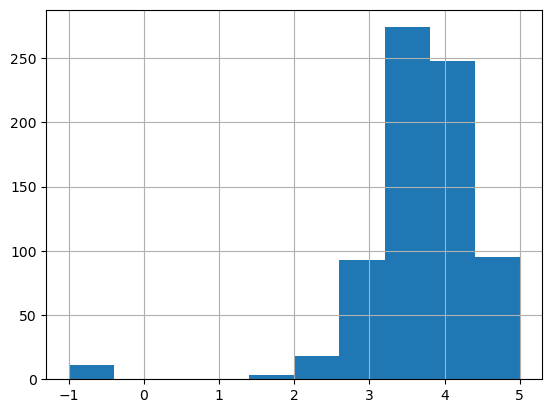

In [29]:
df.Rating.hist()

<Axes: >

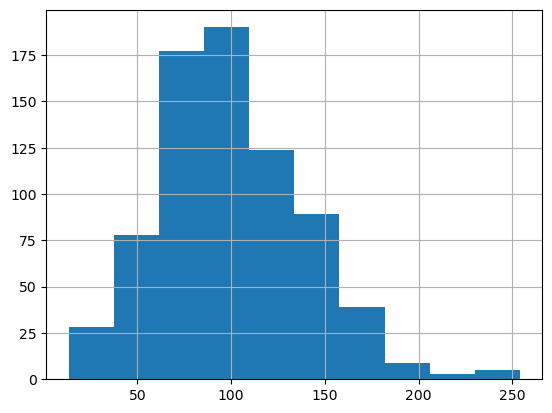

In [30]:
df.avg_salary.hist()

<Axes: >

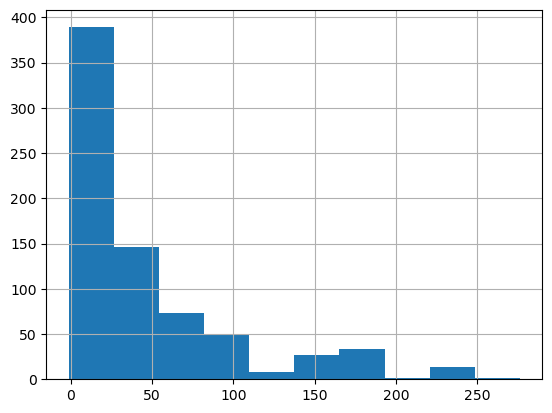

In [31]:
df.age.hist()

<Axes: >

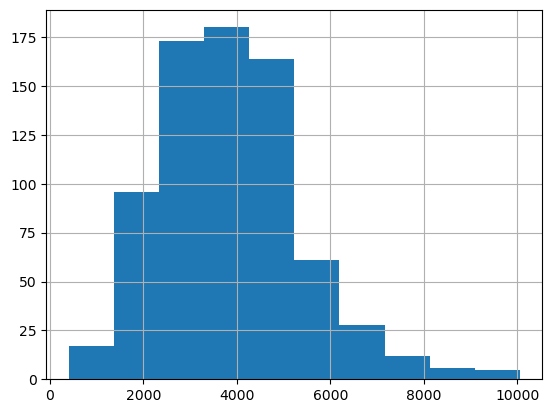

In [32]:
df.desc_len.hist()

<Axes: >

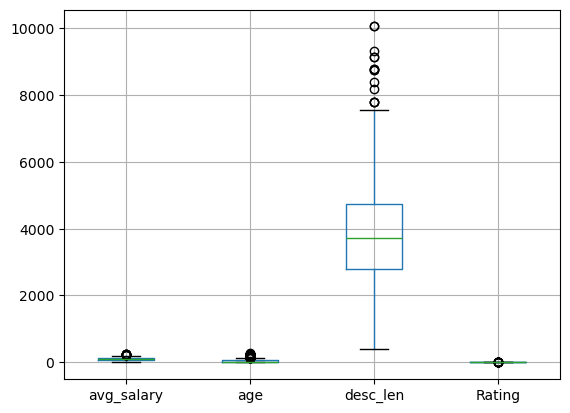

In [33]:
df.boxplot(column=["avg_salary","age","desc_len","Rating"])

<Axes: >

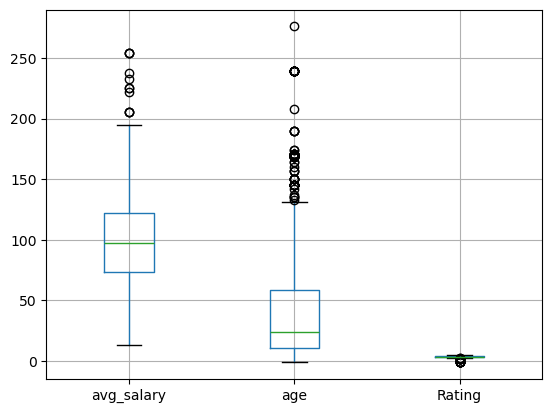

In [34]:
df.boxplot(column=["avg_salary","age","Rating"])

<Axes: >

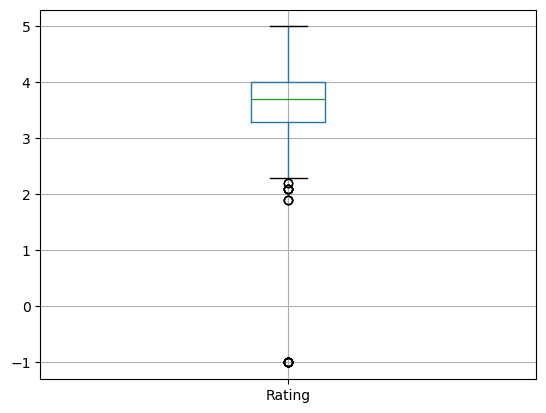

In [35]:
df.boxplot(column=["Rating"])

In [36]:
df[["avg_salary","age","desc_len","Rating"]].corr()

,avg_salary,age,desc_len,Rating
avg_salary,1.000000,0.019655,0.078808,0.013492
age,0.019655,1.000000,0.163911,0.021655
desc_len,0.078808,0.163911,1.000000,-0.012281
Rating,0.013492,0.021655,-0.012281,1.000000


<Axes: >

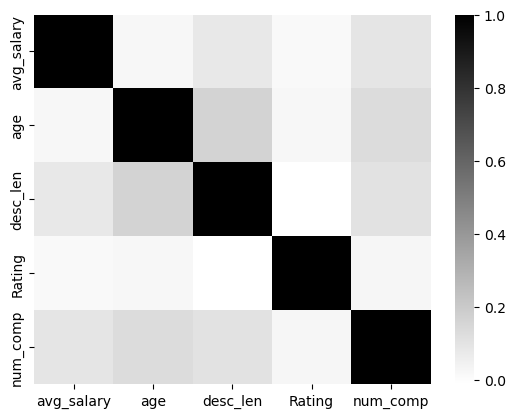

In [37]:
corr = df[["avg_salary","age","desc_len","Rating","num_comp"]].corr()
sns.heatmap(corr, cmap='binary')

In [38]:
df.corr()['avg_salary']

C:\Users\Hardik Kashyap\AppData\Local\Temp\ipykernel_14124\1880485368.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['avg_salary']


Rating               0.013492
Founded             -0.015149
hourly              -0.356082
employer_provided    0.076287
min_salary           0.967765
max_salary           0.986862
avg_salary           1.000000
same_state          -0.034641
age                  0.019655
python_yn            0.327796
R_yn                -0.040000
spark                0.176559
aws                  0.171379
excel               -0.057252
desc_len             0.078808
num_comp             0.093813
Name: avg_salary, dtype: float64

In [39]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [40]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt','job_state','same_state','spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 200


C:\Users\Hardik Kashyap\AppData\Local\Temp\ipykernel_14124\1058533535.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


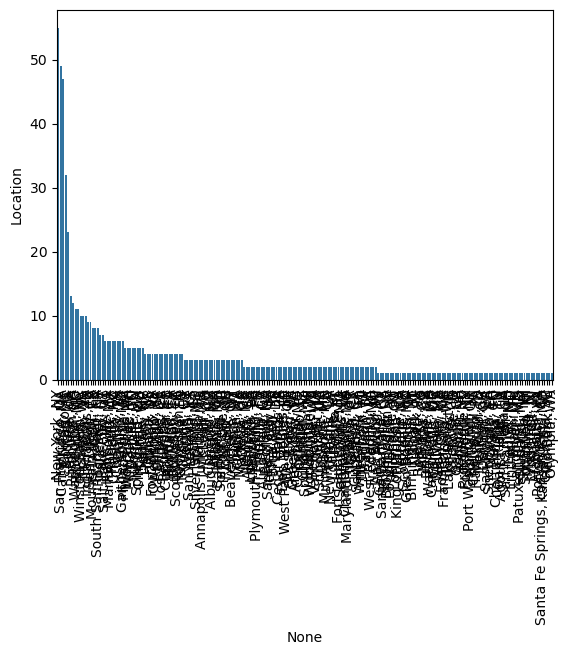

graph for Headquarters: total = 198


C:\Users\Hardik Kashyap\AppData\Local\Temp\ipykernel_14124\1058533535.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


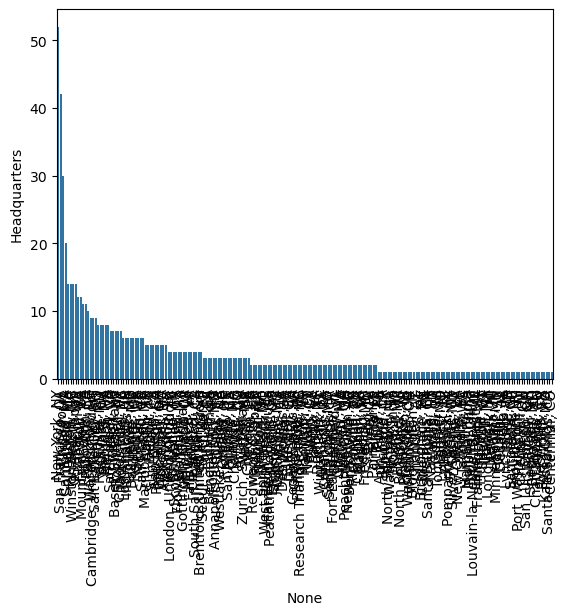

graph for Size: total = 9


C:\Users\Hardik Kashyap\AppData\Local\Temp\ipykernel_14124\1058533535.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


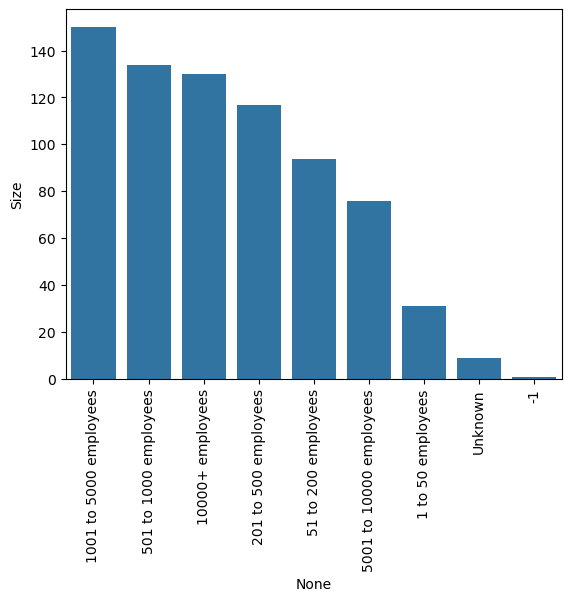

graph for Type of ownership: total = 11


C:\Users\Hardik Kashyap\AppData\Local\Temp\ipykernel_14124\1058533535.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


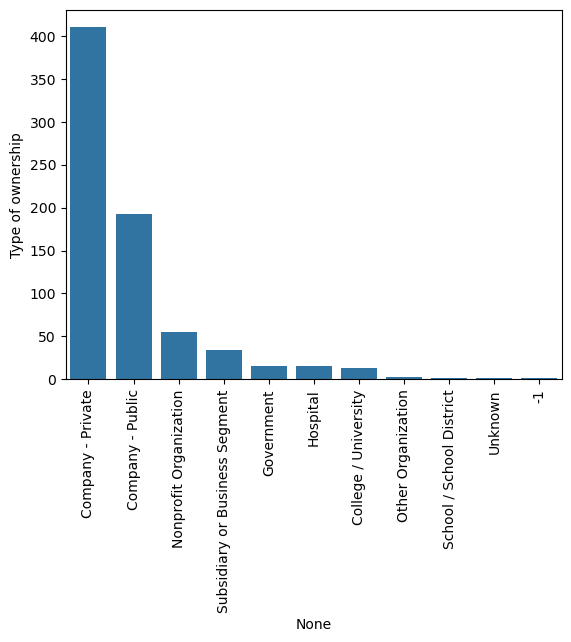

graph for Industry: total = 60


C:\Users\Hardik Kashyap\AppData\Local\Temp\ipykernel_14124\1058533535.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


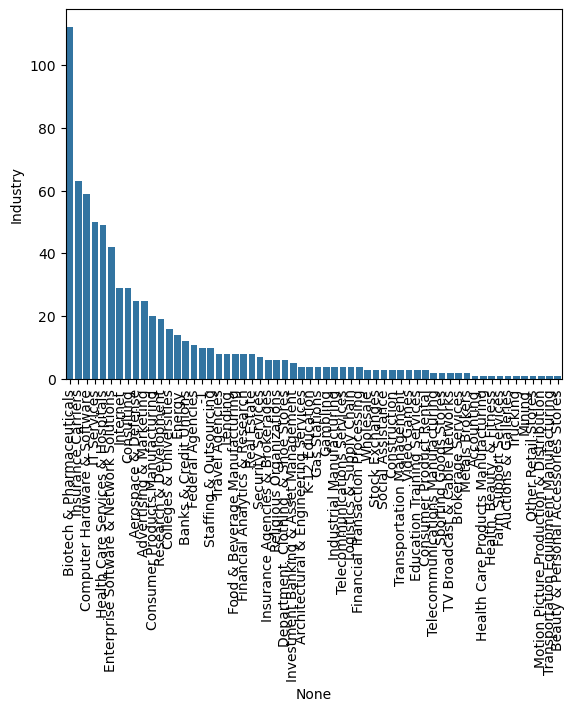

graph for Sector: total = 25


C:\Users\Hardik Kashyap\AppData\Local\Temp\ipykernel_14124\1058533535.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


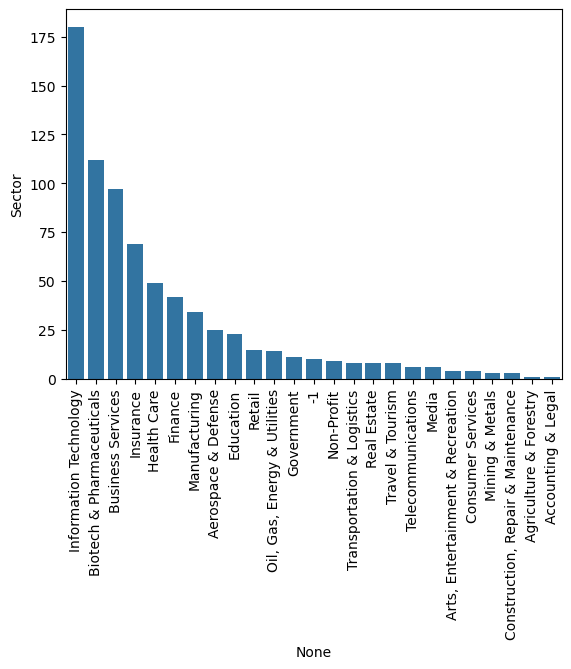

graph for Revenue: total = 14


C:\Users\Hardik Kashyap\AppData\Local\Temp\ipykernel_14124\1058533535.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


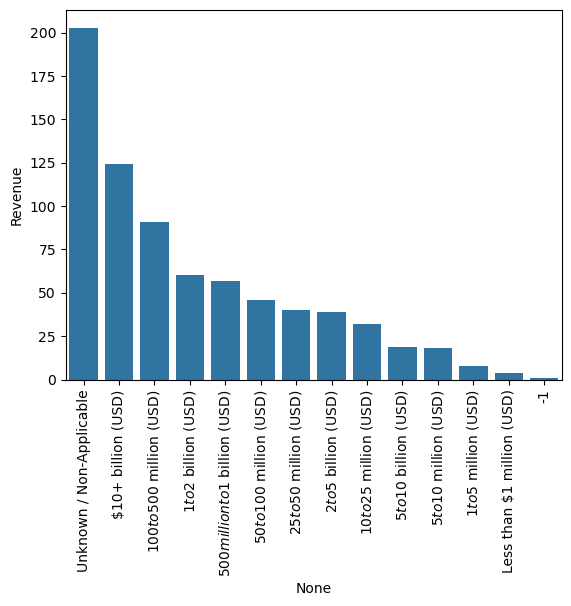

graph for company_txt: total = 343


C:\Users\Hardik Kashyap\AppData\Local\Temp\ipykernel_14124\1058533535.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


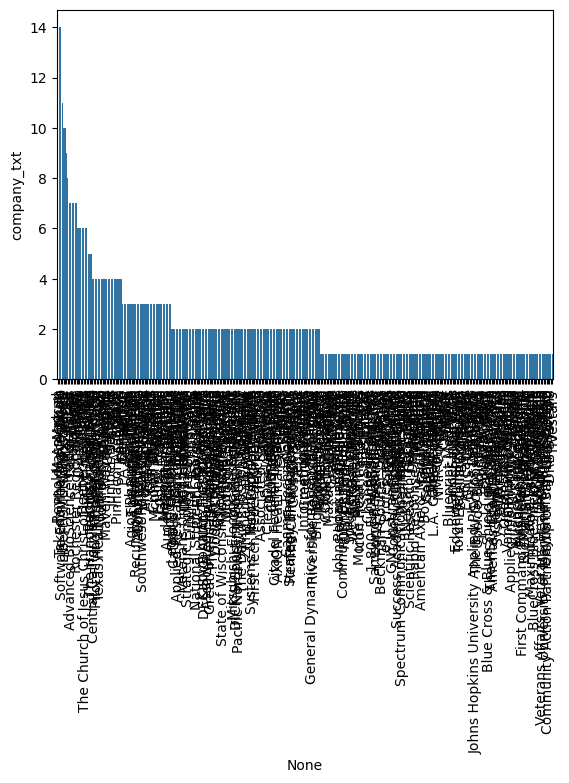

graph for job_state: total = 37


C:\Users\Hardik Kashyap\AppData\Local\Temp\ipykernel_14124\1058533535.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


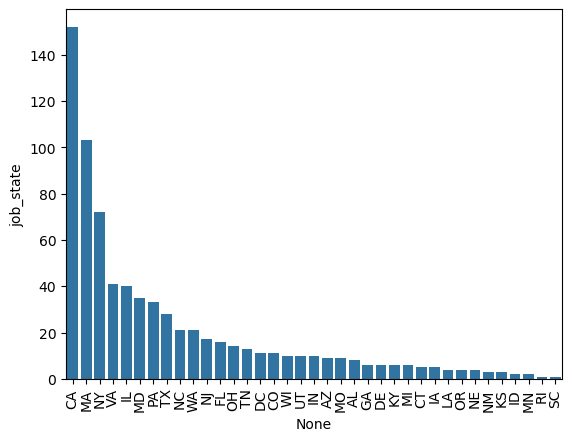

graph for same_state: total = 2


C:\Users\Hardik Kashyap\AppData\Local\Temp\ipykernel_14124\1058533535.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


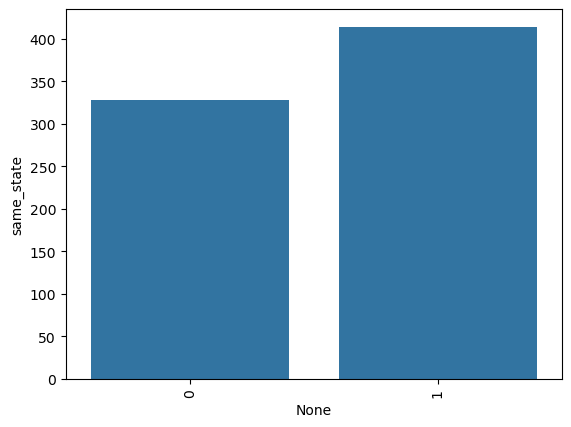

graph for spark: total = 2


C:\Users\Hardik Kashyap\AppData\Local\Temp\ipykernel_14124\1058533535.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


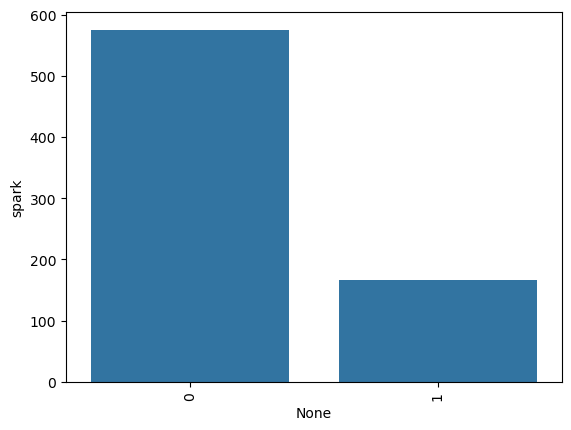

graph for aws: total = 2


C:\Users\Hardik Kashyap\AppData\Local\Temp\ipykernel_14124\1058533535.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


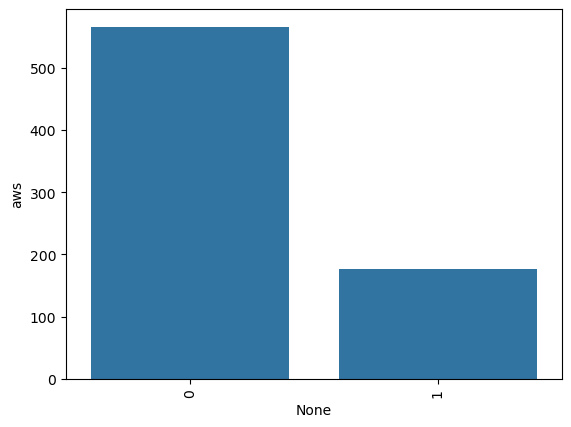

graph for excel: total = 2


C:\Users\Hardik Kashyap\AppData\Local\Temp\ipykernel_14124\1058533535.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


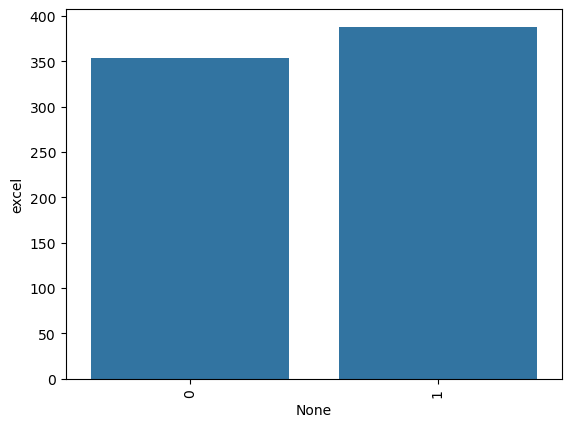

graph for job_simp: total = 7


C:\Users\Hardik Kashyap\AppData\Local\Temp\ipykernel_14124\1058533535.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


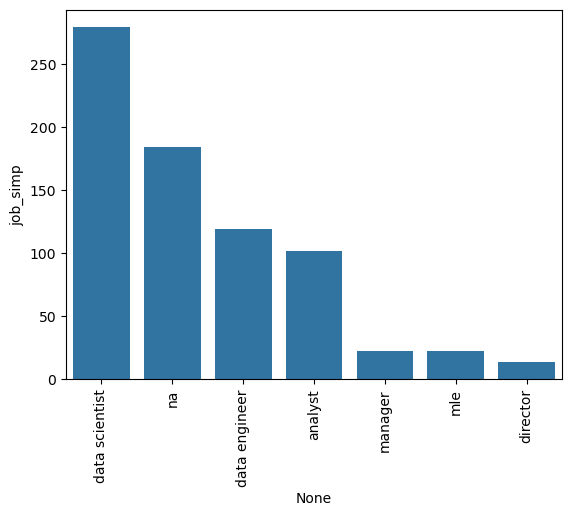

graph for seniority: total = 3


C:\Users\Hardik Kashyap\AppData\Local\Temp\ipykernel_14124\1058533535.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


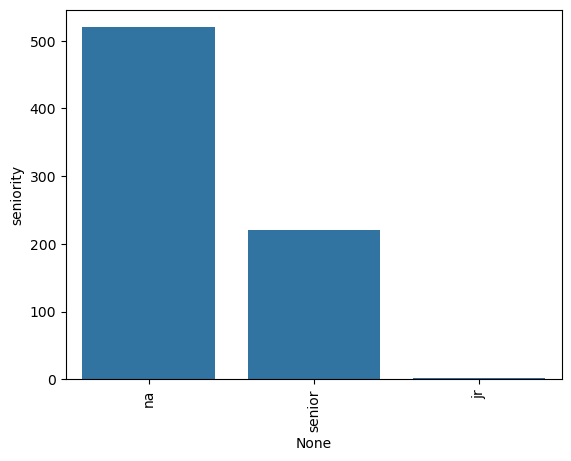

In [41]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d"%(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

C:\Users\Hardik Kashyap\AppData\Local\Temp\ipykernel_14124\3448292368.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


graph for Location: total = 20


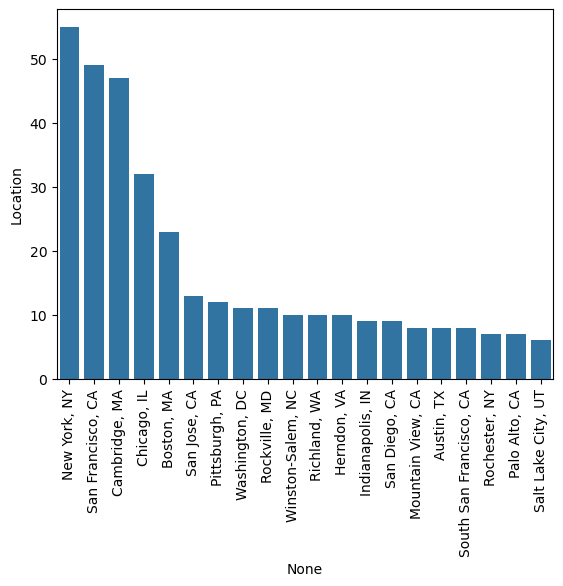

graph for Headquarters: total = 20


C:\Users\Hardik Kashyap\AppData\Local\Temp\ipykernel_14124\3448292368.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


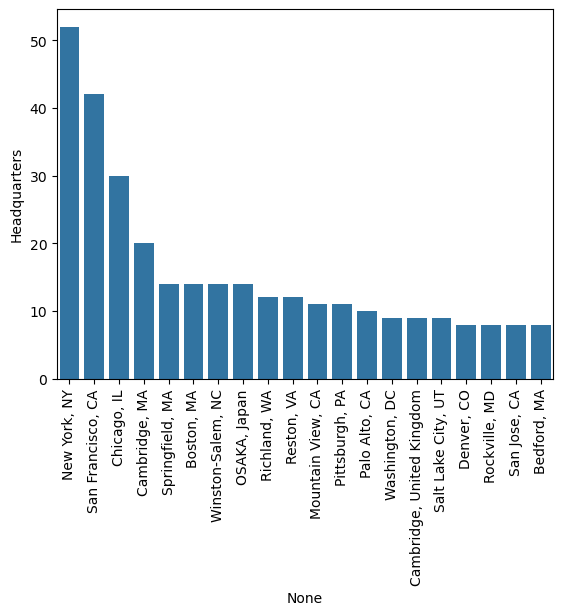

graph for company_txt: total = 20


C:\Users\Hardik Kashyap\AppData\Local\Temp\ipykernel_14124\3448292368.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


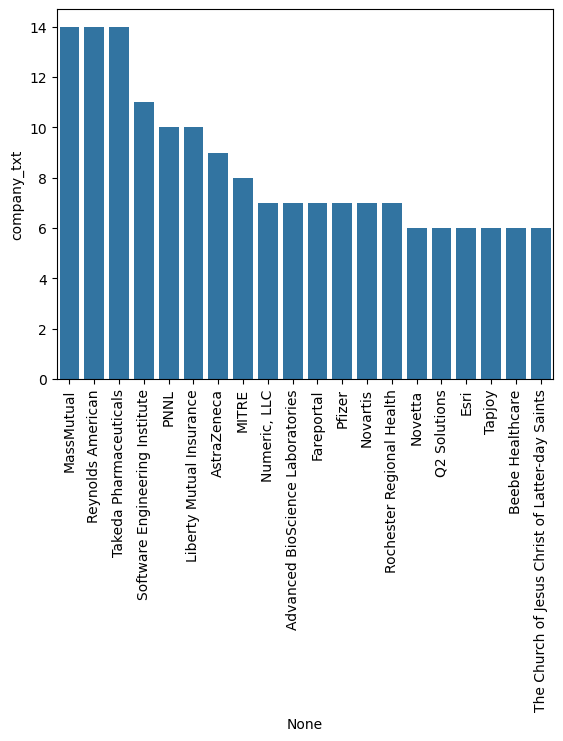

In [42]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d"%(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [43]:
pd.pivot_table(df,index='job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [44]:
pd.pivot_table(df,index=['job_simp','seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [45]:
pd.pivot_table(df,index='job_state', values='avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [46]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [47]:
pd.pivot_table(df,index=['job_state','job_simp'], values='avg_salary')

avg_salary
job_state job_simp                  
AL        analyst          62.200000
          data engineer    65.000000
          na               43.750000
AZ        analyst          55.000000
          data engineer    79.500000
          data scientist   69.500000
          na              124.500000
CA        analyst          85.250000
          data engineer   129.540000
          data scientist  142.522059
          manager          80.611111
          mle             177.300000
          na               99.907407
CO        analyst          29.500000
          data engineer    99.000000
          data scientist  108.666667
          mle             100.500000
          na               31.500000
CT        data scientist   84.000000
          na               62.500000
DC        analyst          63.500000
          data engineer    85.000000
          data scientist  149.000000
DE        na               27.500000
FL        analyst          47.500000
          data engineer    91.833333
          data scientist   97.357143
GA        data scientist   81.333333
          na               80.000000
IA        analyst          43.000000
          data engineer   102.833333
ID        analyst          56.250000
IL        analyst          66.500000
          data engineer    96.125000
          data scientist  117.233333
          director        221.750000
          mle             133.000000
          na               57.166667
IN        data engineer   114.500000
          data scientist   84.500000
          na               69.000000
KS        mle              87.000000
KY        data scientist   84.000000
          na              103.500000
LA        analyst          48.000000
          data engineer    70.500000
          na               20.000000
MA        analyst          59.125000
          data engineer   107.291667
          data scientist  113.750000
          director        117.833333
          manager          71.900000
          na              107.478261
MD        analyst          80.666667
          data engineer   109.000000
          data scientist  109.115385
          na               88.750000
MI        data scientist  106.625000
          manager          87.500000
MN        analyst          76.000000
          data engineer    95.000000
MO        analyst          61.000000
          data scientist  127.666667
          manager          40.500000
          na               72.333333
NC        data engineer   104.250000
          data scientist  117.000000
          na               90.916667
NE        na               41.000000
NJ        analyst          83.583333
          data engineer   112.000000
          data scientist  106.875000
          director        161.500000
          manager         109.500000
          na               82.500000
NM        data scientist   74.333333
NY        analyst          65.607143
          data engineer    86.375000
          data scientist  115.250000
          mle             125.000000
          na               81.583333
OH        analyst          53.875000
          data scientist  105.285714
          na               91.166667
OR        data engineer    73.000000
          data scientist   98.500000
PA        analyst          62.750000
          data engineer    91.500000
          data scientist  113.333333
          manager         109.666667
          mle             120.500000
          na               76.062500
RI        analyst         100.000000
SC        na               60.500000
TN        analyst          13.500000
          data engineer   100.950000
          data scientist   96.000000
TX        data engineer   113.062500
          data scientist  100.730769
          na               41.285714
UT        analyst          54.750000
          data engineer   100.333333
          data scientist  140.500000
VA        analyst          71.583333
          data engineer    96.900000
          data scientist  108.416667
          mle              87.

In [48]:
pd.pivot_table(df,index=['job_state','job_simp'], values='avg_salary',aggfunc='count')

avg_salary
job_state job_simp                  
AL        analyst                  5
          data engineer            1
          na                       2
AZ        analyst                  1
          data engineer            5
          data scientist           1
          na                       2
CA        analyst                 18
          data engineer           25
          data scientist          68
          manager                  9
          mle                      5
          na                      27
CO        analyst                  1
          data engineer            3
          data scientist           3
          mle                      1
          na                       3
CT        data scientist           2
          na                       3
DC        analyst                  2
          data engineer            4
          data scientist           5
DE        na                       6
FL        analyst                  6
          data engineer            3
          data scientist           7
GA        data scientist           3
          na                       3
IA        analyst                  2
          data engineer            3
ID        analyst                  2
IL        analyst                  3
          data engineer            8
          data scientist          15
          director                 6
          mle                      2
          na                       6
IN        data engineer            4
          data scientist           2
          na                       4
KS        mle                      3
KY        data scientist           2
          na                       4
LA        analyst                  1
          data engineer            2
          na                       1
MA        analyst                  4
          data engineer           12
          data scientist          30
          director                 6
          manager                  5
          na                      46
MD        analyst                  3
          data engineer            3
          data scientist          13
          na                      16
MI        data scientist           4
          manager                  2
MN        analyst                  1
          data engineer            1
MO        analyst                  2
          data scientist           3
          manager                  1
          na                       3
NC        data engineer            6
          data scientist           3
          na                      12
NE        na                       4
NJ        analyst                  6
          data engineer            2
          data scientist           4
          director                 2
          manager                  2
          na                       1
NM        data scientist           3
NY        analyst                 14
          data engineer            4
          data scientist          40
          mle                      2
          na                      12
OH        analyst                  4
          data scientist           7
          na                       3
OR        data engineer            1
          data scientist           3
PA        analyst                  8
          data engineer            1
          data scientist           6
          manager                  3
          mle                      7
          na                       8
RI        analyst                  1
SC        na                       1
TN        analyst                  2
          data engineer           10
          data scientist           1
TX        data engineer            8
          data scientist          13
          na                       7
UT        analyst                  4
          data engineer            3
          data scientist           3
VA        analyst                  6
          data engineer           10
          data scientist          18
          mle                 

In [49]:
pd.pivot_table(df[df.job_simp == 'data scientist'],index='job_state', values='avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [50]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [51]:
df_pivots = df[['Rating','Industry','Sector', 'Revenue','num_comp','hourly', 'employer_provided','python_yn', 'R_yn',
       'spark', 'aws', 'excel','desc_len', 'Type of ownership','avg_salary']]

In [52]:
for i in df_pivots.columns:
    print (i)
    print(pd.pivot_table(df_pivots,index=i,values='avg_salary').sort_values('avg_salary',ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [ ]:
pd.pivot_table(df_pivots,index="Revenue",columns="python_yn",values='avg_salary',aggfunc='count')

In [53]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [57]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [63]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Hardik
[nltk_data]     Kashyap\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [65]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

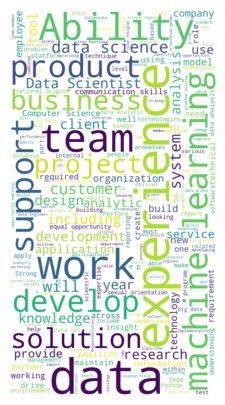

In [75]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'text' column into a single string
text = ' '.join(df['Job Description'].dropna().astype(str))

# Create a word cloud
wordcloud = WordCloud(width=800, height=1500, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
